In [1]:
!lscpu

Architecture:             aarch64
  CPU op-mode(s):         64-bit
  Byte Order:             Little Endian
CPU(s):                   8
  On-line CPU(s) list:    0-7
Vendor ID:                Apple
  Model name:             -
    Model:                0
    Thread(s) per core:   1
    Core(s) per cluster:  8
    Socket(s):            -
    Cluster(s):           1
    Stepping:             0x0
    BogoMIPS:             48.00
    Flags:                fp asimd evtstrm aes pmull sha1 sha2 crc32 atomics fph
                          p asimdhp cpuid asimdrdm jscvt fcma lrcpc dcpop sha3 a
                          simddp sha512 asimdfhm dit uscat ilrcpc flagm sb paca 
                          pacg dcpodp flagm2 frint
Vulnerabilities:          
  Gather data sampling:   Not affected
  Itlb multihit:          Not affected
  L1tf:                   Not affected
  Mds:                    Not affected
  Meltdown:               Not affected
  Mmio stale data:        Not affected
  Reg file data sa

In [ ]:
# 深さ1のLightGBM回帰の可視化

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error

In [ ]:
# データセットの読み込み
df = pd.read_csv(
    "https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data",
    header=None,
    sep="\s+",
)
df.columns = [
    "CRIM",
    "ZN",
    "INDUS",
    "CHAS",
    "NOX",
    "RM",
    "AGE",
    "DIS",
    "RAD",
    "TAX",
    "PTRATIO",
    "B",
    "LSTAT",
    "MEDV",
]
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [ ]:
# 特徴量と目的変数の設定
X_train = df.loc[:99, ["RM"]]
y_train = df.loc[:99, "MEDV"]
print("X_train:", X_train[:3])
print("y_train:", y_train[:3])

X_train:       RM
0  6.575
1  6.421
2  7.185
y_train: 0    24.0
1    21.6
2    34.7
Name: MEDV, dtype: float64


In [ ]:
# ハイパーパラメータの設定
import lightgbm as lgb

lgb_train = lgb.Dataset(X_train, y_train)
params = {
    "objective": "mse",
    "metric": "mse",
    "learning_rate": 0.8,
    "max_depth": 1,
    "min_data_in_leaf": 1,
    "min_data_in_bin": 1,
    "max_bin": 100,
    "seed": 0,
    "verbose": -1,
}

In [ ]:
# モデルの学習
model = lgb.train(
    params, lgb_train, num_boost_round=1, valid_sets=[lgb_train], valid_names=["train"]
)

In [ ]:
# 学習データの予測と評価
y_train_pred = model.predict(X_train)
print("MSE train: %.2f" % mean_squared_error(y_train, y_train_pred))

MSE train: 17.10


In [ ]:
model.predict(X_train)

array([21.040891  , 21.040891  , 31.60846732, 31.60846732, 31.60846732,
       21.040891  , 21.040891  , 21.040891  , 21.040891  , 21.040891  ,
       21.040891  , 21.040891  , 21.040891  , 21.040891  , 21.040891  ,
       21.040891  , 21.040891  , 21.040891  , 21.040891  , 21.040891  ,
       21.040891  , 21.040891  , 21.040891  , 21.040891  , 21.040891  ,
       21.040891  , 21.040891  , 21.040891  , 21.040891  , 21.040891  ,
       21.040891  , 21.040891  , 21.040891  , 21.040891  , 21.040891  ,
       21.040891  , 21.040891  , 21.040891  , 21.040891  , 21.040891  ,
       31.60846732, 21.040891  , 21.040891  , 21.040891  , 21.040891  ,
       21.040891  , 21.040891  , 21.040891  , 21.040891  , 21.040891  ,
       21.040891  , 21.040891  , 21.040891  , 21.040891  , 21.040891  ,
       31.60846732, 21.040891  , 31.60846732, 21.040891  , 21.040891  ,
       21.040891  , 21.040891  , 21.040891  , 21.040891  , 31.60846732,
       21.040891  , 21.040891  , 21.040891  , 21.040891  , 21.04

<Axes: >

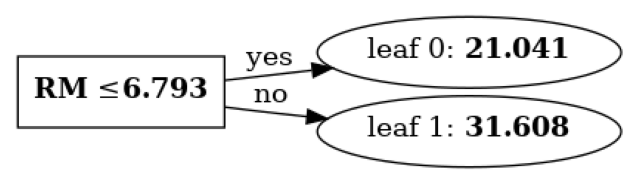

In [ ]:
# 木の可視化
lgb.plot_tree(model, tree_index=0, figsize=(8, 6))

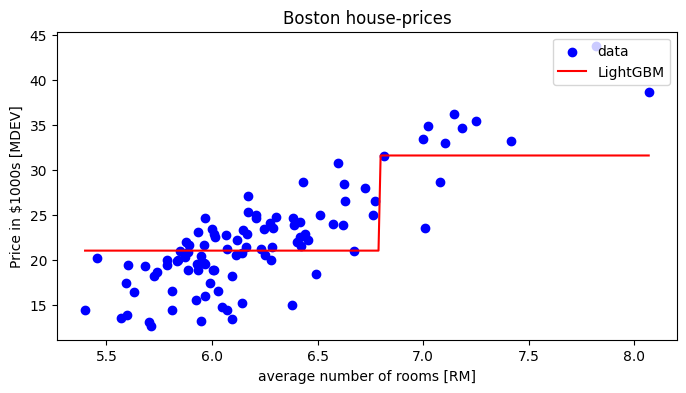

In [ ]:
# データと予測値の可視化
plt.figure(figsize=(8, 4))
X = X_train.values.flatten()
y = y_train.values

X_plt = np.arange(X.min(), X.max(), 0.01)[:, np.newaxis]
y_pred = model.predict(X_plt)

plt.scatter(X, y, color="blue", label="data")
plt.plot(X_plt, y_pred, color="red", label="LightGBM")
plt.ylabel("Price in $1000s [MDEV]")
plt.xlabel("average number of rooms [RM]")
plt.title("Boston house-prices")
plt.legend(loc="upper right")
plt.show()

In [ ]:
# LightGBM回帰の学習→予測→評価

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, root_mean_squared_error

In [ ]:
df = pd.read_csv(
    "https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data",
    header=None,
    sep="\s+",
)
df.columns = [
    "CRIM",
    "ZN",
    "INDUS",
    "CHAS",
    "NOX",
    "RM",
    "AGE",
    "DIS",
    "RAD",
    "TAX",
    "PTRATIO",
    "B",
    "LSTAT",
    "MEDV",
]
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [ ]:
X = df.drop(["MEDV"], axis=1)
y = df["MEDV"]
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33


In [ ]:
# 学習データとテストデータに分割
from numpy import test

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=True, random_state=0
)
print("X_trainの形状:", X_train.shape)
print("y_trainの形状:", y_train.shape)
print("X_testの形状:", X_test.shape)
print("y_testの形状:", y_test.shape)

X_trainの形状: (404, 13)
y_trainの形状: (404,)
X_testの形状: (102, 13)
y_testの形状: (102,)


In [ ]:
# ハイパーパラメータの設定
import lightgbm as lgb

lgb_train = lgb.Dataset(X_train, y_train)
params = {
    "objective": "mse",
    "num_leaves": 5,
    "seed": 0,
    "verbose": -1,
}

In [ ]:
# モデルの学習
model = lgb.train(
    params,
    lgb_train,
    num_boost_round=50,
    valid_sets=[lgb_train],
    valid_names=["train"],
    callbacks=[lgb.log_evaluation(10)],
)

[10]	train's l2: 23.2264
[20]	train's l2: 11.4353
[30]	train's l2: 8.26905
[40]	train's l2: 6.83309
[50]	train's l2: 5.88687


In [ ]:
# 学習データの予測と評価
y_test_pred = model.predict(X_test)
print("RMSE test: %.2f" % root_mean_squared_error(y_test, y_test_pred))

RMSE test: 4.97


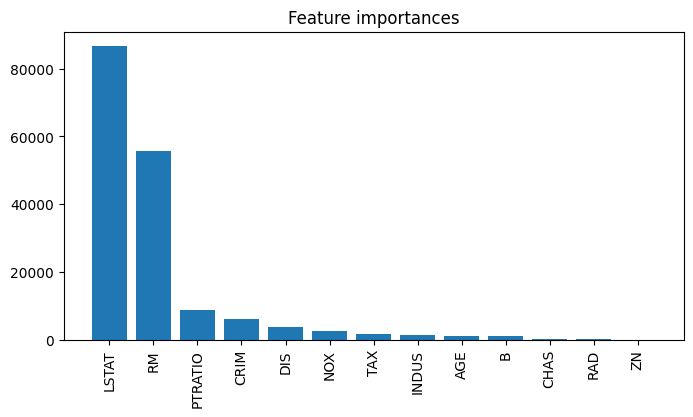

In [ ]:
# 特徴量の重要度の可視化
importances = model.feature_importance(importance_type="gain")
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(8, 4))
plt.title("Feature importances")
plt.bar(range(len(indices)), importances[indices])
plt.xticks(range(len(indices)), X.columns[indices], rotation=90)
plt.show()

<Axes: >

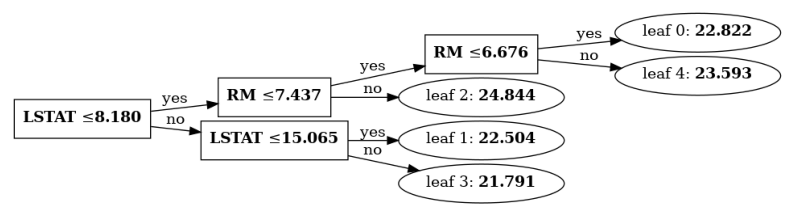

In [ ]:
# 木の可視化
lgb.plot_tree(model, tree_index=0, figsize=(10, 10))

<Axes: >

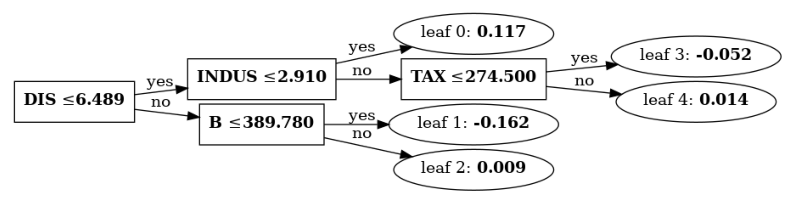

In [ ]:
# 木の可視化
lgb.plot_tree(model, tree_index=-1, figsize=(10, 10))